In [18]:
import pandas as pd

In [19]:
dataset = pd.read_csv('Customers.csv')

In [20]:
dataset.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
181,182,Female,32,97,86
78,79,Female,23,54,52
9,10,Female,30,19,72
36,37,Female,42,34,17
149,150,Male,34,78,90


In [21]:
data = dataset[['Annual Income (k$)','Spending Score (1-100)']]
data.sample(5)

,Annual Income (k$),Spending Score (1-100)
183,98,88
36,34,17
74,54,47
143,76,87
132,72,34


In [22]:
data = data.rename(columns={'Annual Income (k$)':'income', 'Spending Score (1-100)':'score'})
data.sample(5)

,income,score
45,39,65
28,29,31
39,37,75
147,77,74
12,20,15


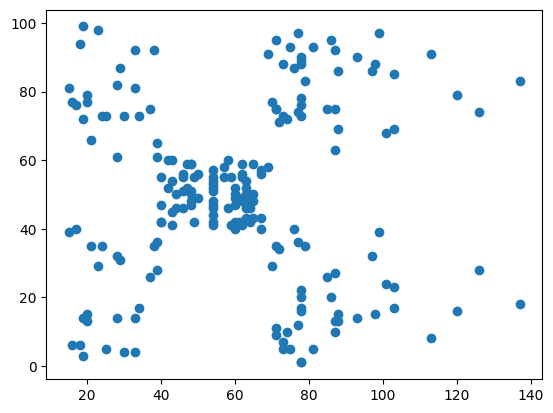

In [23]:
import matplotlib.pyplot as plt
plt.scatter(data['income'], data['score'])

In [24]:
from sklearn.cluster import KMeans


In [25]:
k_values = [1,2,3,4,5,6,7,8,9,10]
wcss_error = []
for k in k_values:
    model = KMeans(n_clusters=k)
    model.fit(data)
    wcss_error.append(model.inertia_)

In [26]:
wcss_error

[269981.28,
 183154.57952156937,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37455.98455516028,
 33647.5529591023,
 30100.55438311689,
 21797.08494464637,
 21460.161962165257]

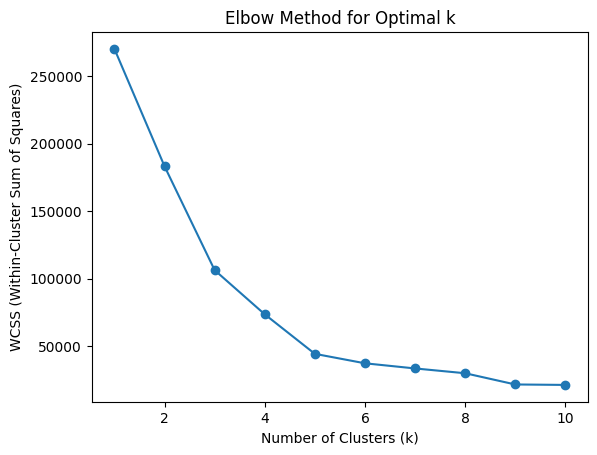

In [27]:
# Plot the WCSS for the Elbow method
plt.plot(k_values, wcss_error, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [28]:
# train model using k=5
model = KMeans(n_clusters=5)
pred = model.fit_predict(data[['income','score']])

In [29]:
pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [30]:
# add cluster column to dataset
data['cluster'] = pred

In [31]:

data.sample(5)

,income,score,cluster
189,103,85,1
121,67,40,2
136,73,7,0
106,63,50,2
4,17,40,4


In [32]:
# centers of clusters
model.cluster_centers_

array([[87.75      , 17.58333333],
       [86.53846154, 82.12820513],
       [55.0875    , 49.7125    ],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

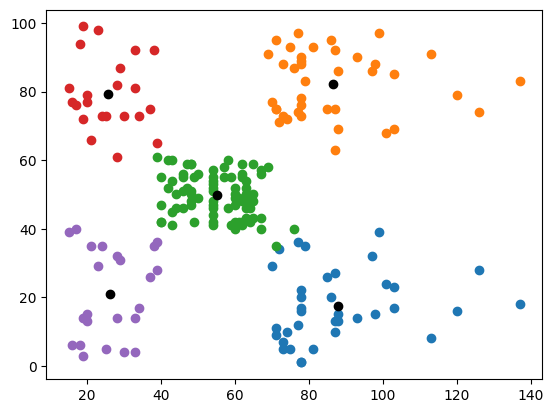

In [33]:
# visualize clusted data

cluster1 = data[data['cluster']==0]
plt.scatter(cluster1['income'], cluster1['score'])

cluster2 = data[data['cluster']==1]
plt.scatter(cluster2['income'], cluster2['score'])

cluster3 = data[data['cluster']==2]
plt.scatter(cluster3['income'], cluster3['score'])

cluster2 = data[data['cluster']==3]
plt.scatter(cluster2['income'], cluster2['score'])

cluster3 = data[data['cluster']==4]
plt.scatter(cluster3['income'], cluster3['score'])

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='black')